<a href="https://colab.research.google.com/github/goutam63/machine-learning-projects/blob/main/h1n1_smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns",None)
features_df = pd.read_csv("features.csv",index_col=0)
features_df.head(3)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo


In [3]:
labels_df = pd.read_csv("labels.csv",index_col=0)
labels_df.head(3)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0


In [4]:
num_data = features_df.select_dtypes(exclude="object")
num_data

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0



                                             Statistical Analysis of Numerical type data                                              



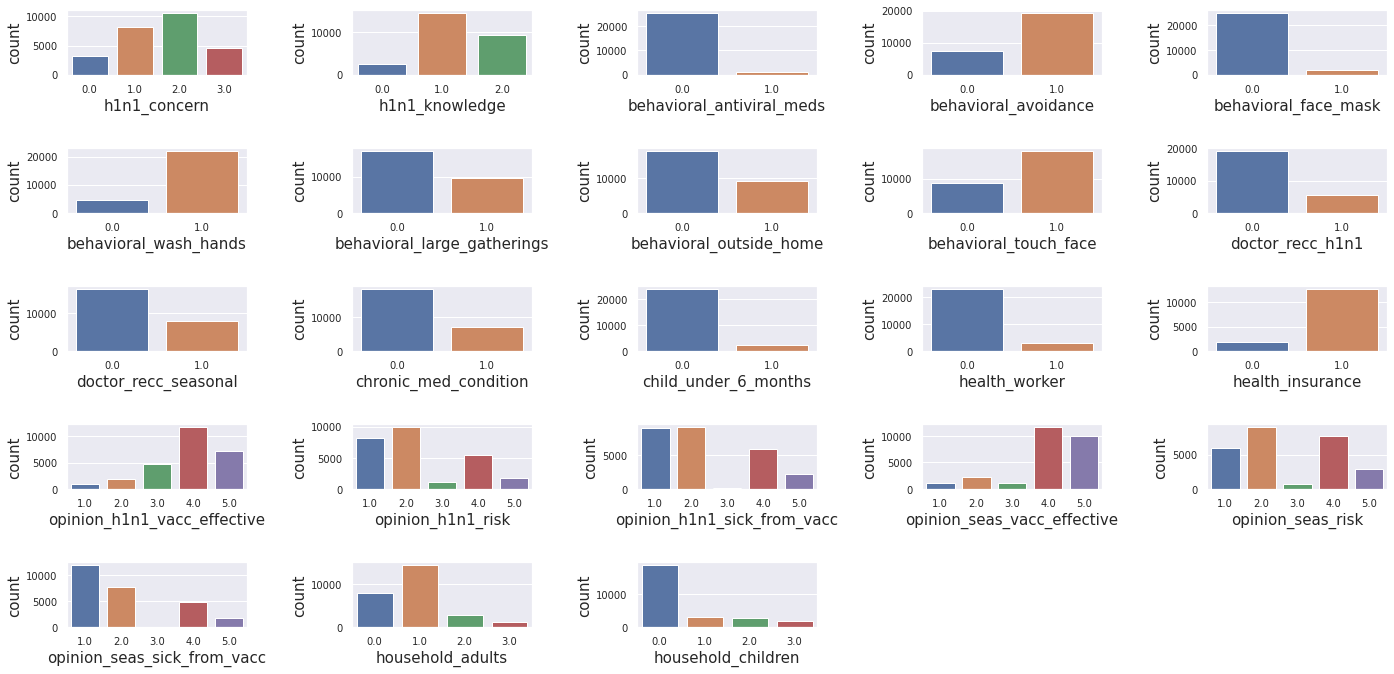

In [5]:
sns.set(rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":10,"ytick.labelsize":10,
            "legend.fontsize":12})
plt.figure(figsize=(20,10))

txt = "Statistical Analysis of Numerical type data"
x = txt.center(134)
print(f"\033[1m\n{x}\n")

for index,cols in enumerate(num_data):
    plt.subplot(5,5,index+1)
    sns.countplot(num_data.loc[:,cols])
plt.tight_layout(pad=2)

In [6]:
obj_data = features_df.select_dtypes(include="object")
obj_data

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN



                                         Statistical Analysis of Categorical type data                                          



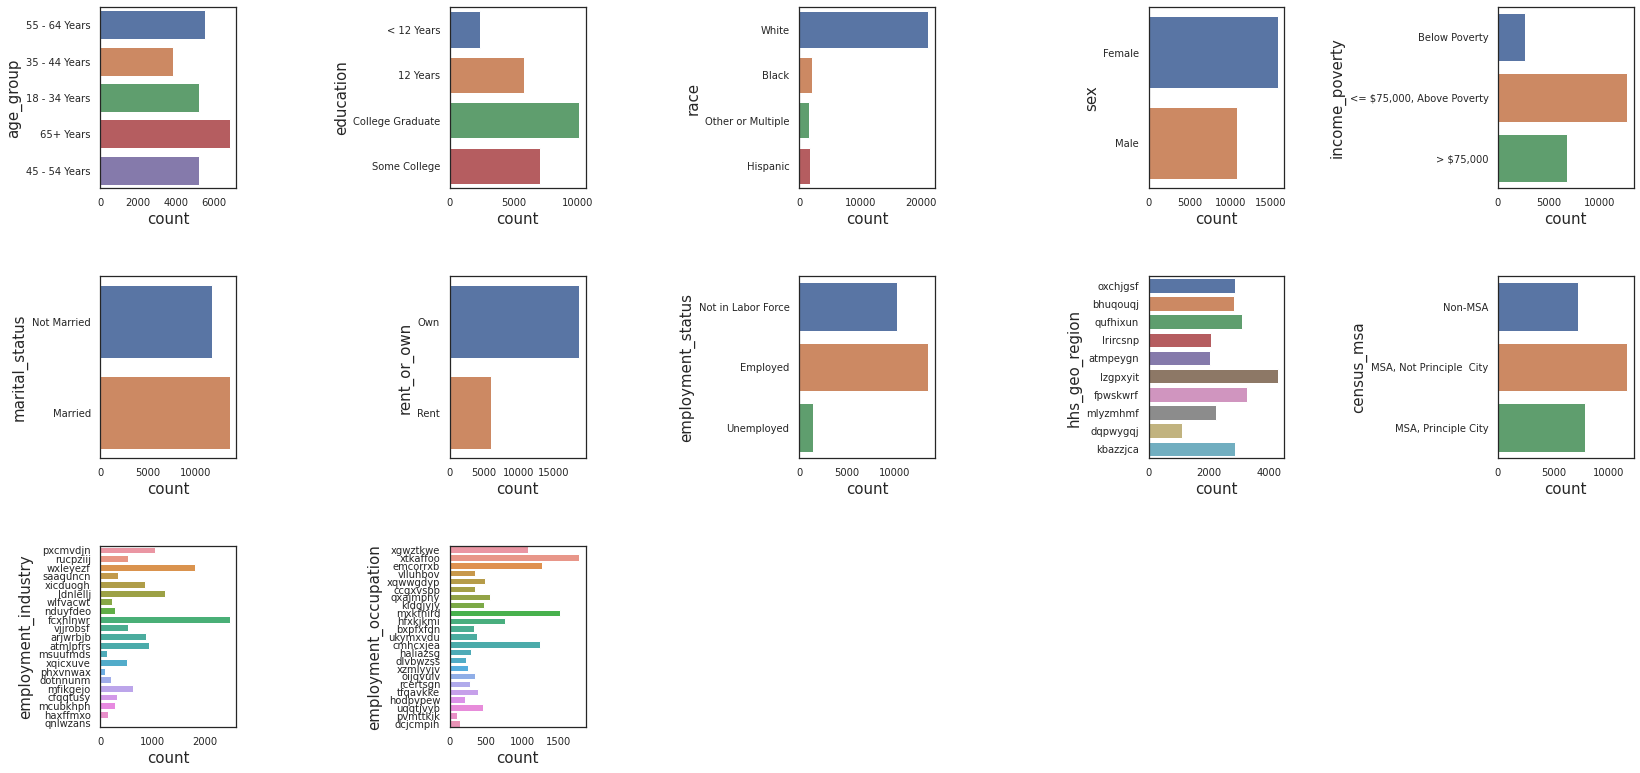

In [7]:
fig = plt.figure(figsize=(24,15))

txt = "Statistical Analysis of Categorical type data"
x = txt.center(128)
print(f"\033[1m\n{x}\n")
sns.set_style("white")
for index in range(len(obj_data.columns)):
    plt.subplot(4,5,index+1)
    sns.countplot( y =obj_data.iloc[:,index])
fig.tight_layout(pad=3)

In [8]:
num_data.isna().sum()/num_data.shape[0] * 100

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
household_adults                0.932340
household_children              0.932340
dtype: float64

In [9]:
num_data = num_data.drop(["health_insurance"],axis=1)

In [10]:
obj_data.isna().sum()/obj_data.shape[0] * 100

age_group                 0.000000
education                 5.268282
race                      0.000000
sex                       0.000000
income_poverty           16.561201
marital_status            5.272026
rent_or_own               7.645936
employment_status         5.477965
hhs_geo_region            0.000000
census_msa                0.000000
employment_industry      49.912008
employment_occupation    50.436215
dtype: float64

In [11]:
obj_data = obj_data.drop(["employment_industry","employment_occupation"],axis=1)

In [12]:
num_data = num_data.fillna(num_data.median())

In [13]:
num_data.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
dtype: int64

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
obj_data.iloc[:,:] = imputer.fit_transform(obj_data)

In [15]:
obj_data.isna().sum()

age_group            0
education            0
race                 0
sex                  0
income_poverty       0
marital_status       0
rent_or_own          0
employment_status    0
hhs_geo_region       0
census_msa           0
dtype: int64

In [16]:
final_df = pd.concat([num_data,obj_data],axis=1)
final_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City"
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City"
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City"


In [17]:
final_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City"
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City"
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City"


In [18]:
convert_dict = {'opinion_h1n1_vacc_effective': int,
                'opinion_h1n1_risk': int,
                'opinion_h1n1_sick_from_vacc': int,
                'opinion_seas_vacc_effective': int,
                'opinion_seas_risk': int,
                'opinion_seas_sick_from_vacc': int,
                'behavioral_antiviral_meds': int,
                'behavioral_avoidance': int,
                'behavioral_face_mask': int,
                'behavioral_wash_hands': int,
                'behavioral_large_gatherings': int,
                'behavioral_outside_home': int,
                'behavioral_touch_face': int,
                } 
final_df = final_df.astype(convert_dict) 

In [19]:
#final_df['behavioral_antiviral_meds'] = final_df['behavioral_antiviral_meds'].replace([1,0],["c","i"])
#final_df['behavioral_avoidance'] = final_df['behavioral_avoidance'].replace([1,0],["p","n"])
#final_df['behavioral_face_mask'] = final_df['behavioral_face_mask'].replace([1,0],["P","N"])
#final_df['behavioral_wash_hands'] = final_df['behavioral_wash_hands'].replace([1,0],["T","F"])
#final_df['behavioral_large_gatherings'] = final_df['behavioral_large_gatherings'].replace([1,0],["t","f"])
#final_df['behavioral_outside_home'] = final_df['behavioral_outside_home'].replace([1,0],["R","W"])
#final_df['behavioral_touch_face'] = final_df['behavioral_touch_face'].replace([1,0],["r","w"])

In [20]:
final_df['behavioral'] =  final_df['behavioral_antiviral_meds'].astype(str)+ final_df['behavioral_avoidance'].astype(str)+final_df['behavioral_face_mask'].astype(str)+final_df['behavioral_wash_hands'].astype(str)+final_df['behavioral_large_gatherings'].astype(str) + final_df['behavioral_outside_home'].astype(str)+final_df['behavioral_touch_face'].astype(str)
#pd.set_option("display.max_rows",None)
final_df['behavioral'].value_counts()

0101001    5533
0101111    3940
0101000    2096
0000000    2060
0101101    1453
           ... 
1110110       1
0010010       1
0110010       1
0110100       1
0010011       1
Name: behavioral, Length: 113, dtype: int64

In [21]:
final_df['opinion_h1n1'] = final_df['opinion_h1n1_vacc_effective'].astype(str)+ final_df['opinion_h1n1_risk'].astype(str)+final_df['opinion_h1n1_sick_from_vacc'].astype(str) 

final_df['opinion_h1n1'].value_counts()
print(final_df['opinion_h1n1'].nunique())

118


In [22]:
final_df['opinion_seasonal_flu'] = final_df['opinion_seas_vacc_effective'].astype(str)+final_df['opinion_seas_risk'].astype(str) +final_df['opinion_seas_sick_from_vacc'].astype(str)

final_df['opinion_seasonal_flu'].value_counts()
print(final_df['opinion_seasonal_flu'].nunique())
final_df['opinion_seasonal_flu']

120


respondent_id
0        212
1        424
2        412
3        541
4        314
        ... 
26702    522
26703    511
26704    542
26705    212
26706    511
Name: opinion_seasonal_flu, Length: 26707, dtype: object

In [23]:
final_df = final_df.drop(['behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc'],axis=1)

In [24]:
final_df

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,behavioral,opinion_h1n1,opinion_seasonal_flu
respondent_id,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0000011,312,212
1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0101011,544,424
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0100000,311,412
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0101100,335,541
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",0101101,332,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0100010,311,522
26703,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",0101000,422,511
26704,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0111101,442,542


In [25]:
final_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1',
       'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
       'health_worker', 'household_adults', 'household_children', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'behavioral', 'opinion_h1n1', 'opinion_seasonal_flu'],
      dtype='object')

In [26]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
final_df[['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa','behavioral', 'opinion_h1n1', 'opinion_seasonal_flu']] = final_df[['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region','behavioral', 'opinion_h1n1',
       'opinion_seasonal_flu','census_msa']].apply(label.fit_transform)

In [27]:
final_df

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,behavioral,opinion_h1n1,opinion_seasonal_flu
respondent_id,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,3,0,2,1,0,1,8,3,46,24,2
1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,3,1,2,1,1,0,1,43,112,79,0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0,2,3,1,0,1,0,0,9,32,45,72,0
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4,0,3,0,2,1,1,1,5,44,59,110,1
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,3,3,0,0,0,0,0,9,45,56,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3,3,0,0,1,0,1,9,34,45,101,2
26703,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0,2,3,1,0,1,1,0,6,40,76,95,1
26704,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3,0,0,1,0,0,6,61,86,111,0


In [28]:
from imblearn.over_sampling import RandomOverSampler,SMOTENC,SMOTE
oversampling = SMOTE()
final_df_over , labels_df_over = oversampling.fit_sample(final_df,labels_df.iloc[:,0])
final_df_over = pd.DataFrame(final_df_over)
final_df_over.columns = ['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1',
       'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
       'health_worker', 'household_adults', 'household_children', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'behavioral', 'opinion_h1n1', 'opinion_seasonal_flu']
final_df_over

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,behavioral,opinion_h1n1,opinion_seasonal_flu
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,1.000000,3.0,0.000000,2.000000,1.000000,0.0,1.000000,8.000000,3.000000,46.000000,24.000000,2.000000
1,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,3.0,1.000000,2.000000,1.000000,1.0,0.000000,1.000000,43.000000,112.000000,79.000000,0.000000
2,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.0,0.000000,2.000000,3.0,1.000000,0.000000,1.000000,0.0,0.000000,9.000000,32.000000,45.000000,72.000000,0.000000
3,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,4.000000,0.000000,3.0,0.000000,2.000000,1.000000,1.0,1.000000,5.000000,44.000000,59.000000,110.000000,1.000000
4,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,2.000000,3.000000,3.0,0.000000,0.000000,0.000000,0.0,0.000000,9.000000,45.000000,56.000000,49.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42061,1.098344,1.000000,0.098344,0.098344,0.000000,0.901656,0.000000,1.000000,0.0,3.901656,2.000000,3.0,0.901656,0.098344,0.000000,0.0,1.000000,8.098344,40.098344,75.098344,89.000000,0.098344
42062,2.000000,1.311035,0.688965,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,3.311035,0.933105,3.0,0.000000,0.000000,0.000000,0.0,1.688965,6.622070,41.000000,94.311035,75.377930,0.000000
42063,1.000000,1.557715,1.000000,1.000000,0.000000,0.000000,0.557715,1.000000,0.0,2.442285,2.442285,3.0,0.000000,0.557715,0.557715,0.0,0.442285,4.000000,14.115431,109.442285,110.000000,0.000000
42064,0.085574,1.000000,1.000000,1.000000,0.085574,0.000000,0.000000,1.000000,0.0,3.000000,0.000000,3.0,0.085574,0.000000,0.000000,0.0,1.000000,3.342297,37.743278,70.000000,76.085574,0.000000


In [29]:
labels_df_over = pd.DataFrame(labels_df_over)
labels_df_over.columns = ["h1n1_vaccine"]
labels_df_over

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0
...,...
42061,1
42062,1
42063,1
42064,1


In [30]:
#plt.figure(figsize=(15,10))
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(final_df_over,labels_df_over)
feat_importance = pd.DataFrame(importance,final_df_over.columns[0:len(final_df_over.columns)])
feat_importance = feat_importance*100
feat_importance.columns = ["Score"]
feat_importance.nlargest(11,"Score")
#plt.show()

,Score
behavioral,27.070755
hhs_geo_region,23.147905
opinion_h1n1,21.953844
age_group,20.626062
doctor_recc_h1n1,20.270143
h1n1_concern,19.478758
education,17.580172
opinion_seasonal_flu,17.162647
census_msa,16.539756
h1n1_knowledge,15.816891


In [31]:
final_df_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42066 entries, 0 to 42065
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   h1n1_concern           42066 non-null  float64
 1   h1n1_knowledge         42066 non-null  float64
 2   doctor_recc_h1n1       42066 non-null  float64
 3   doctor_recc_seasonal   42066 non-null  float64
 4   chronic_med_condition  42066 non-null  float64
 5   child_under_6_months   42066 non-null  float64
 6   health_worker          42066 non-null  float64
 7   household_adults       42066 non-null  float64
 8   household_children     42066 non-null  float64
 9   age_group              42066 non-null  float64
 10  education              42066 non-null  float64
 11  race                   42066 non-null  float64
 12  sex                    42066 non-null  float64
 13  income_poverty         42066 non-null  float64
 14  marital_status         42066 non-null  float64
 15  re

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2,k=15)
fit = bestfeatures.fit(final_df_over,labels_df_over)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(final_df_over.columns)
featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns = ['feature_names','Scores']
t=[]
for i in featurescores.nlargest(11,"Scores").feature_names:
  t.append(i)
t

k = []
for i in featurescores.nlargest(16,"Scores").feature_names:
    k.append(i)
k

['behavioral',
 'opinion_h1n1',
 'doctor_recc_h1n1',
 'census_msa',
 'doctor_recc_seasonal',
 'health_worker',
 'h1n1_concern',
 'chronic_med_condition',
 'h1n1_knowledge',
 'child_under_6_months',
 'age_group',
 'marital_status',
 'rent_or_own',
 'education',
 'race',
 'sex']

In [33]:
x = final_df_over.iloc[:,:]
y = labels_df_over

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.30)

In [35]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
y_predict = model_rf.predict(x_test)
y_train.value_counts()

h1n1_vaccine
1               14725
0               14721
dtype: int64

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(log_loss(y_test,y_predict))
print(classification_report(y_test,y_predict))


0.8975435816164817
[[5906  406]
 [ 887 5421]]
3.5387450487461316
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6312
           1       0.93      0.86      0.89      6308

    accuracy                           0.90     12620
   macro avg       0.90      0.90      0.90     12620
weighted avg       0.90      0.90      0.90     12620



0.9556664470569892


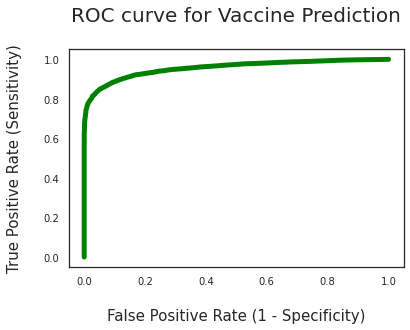

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve,auc
tpr,fpr,thresholds = roc_curve(y_test,model_rf.predict_proba(x_test)[:,1])
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
y_predict = model_rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
plt.title('ROC curve for Vaccine Prediction\n')
plt.xlabel('\nFalse Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)\n')
plt.plot(fpr, tpr,color='green',lw=5)
print(roc_auc_score(y_test,y_predict))
plt.show()

0.9660573267539662


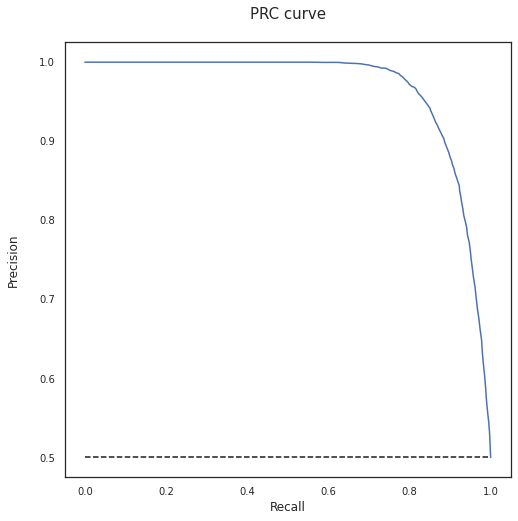

In [38]:
precision, recall, thresholds = precision_recall_curve(y_test, y_predict)

plt.figure(figsize = (8,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('Recall',fontsize=12)
plt.ylabel('Precision\n',fontsize=12)
plt.title('PRC curve\n',fontsize=15)
print(auc(recall, precision))
plt.show()

In [39]:
import xgboost as xgb
from xgboost import XGBClassifier

In [42]:
model3 = XGBClassifier()

In [43]:
model3.fit(x_train,y_train)
y_pred1 = model3.predict(x_test)

In [44]:
print(f"accuracy_score :{accuracy_score(y_test,y_pred1)}\n")
print(confusion_matrix(y_test,y_pred1))
print(f"\nlog_loss : {log_loss(y_test,y_pred1)}\n")
print(classification_report(y_test,y_pred1))


accuracy_score :0.8958003169572107

[[5931  381]
 [ 934 5374]]

log_loss : 3.5989536930212727

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6312
           1       0.93      0.85      0.89      6308

    accuracy                           0.90     12620
   macro avg       0.90      0.90      0.90     12620
weighted avg       0.90      0.90      0.90     12620



0.9560043882755356


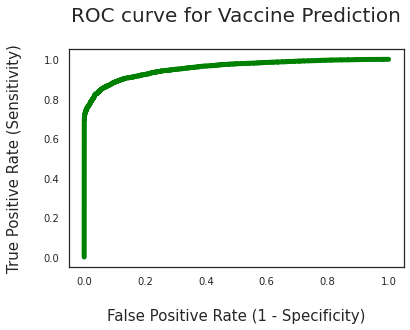

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve,auc
tpr,fpr,thresholds = roc_curve(y_test,model3.predict_proba(x_test)[:,1])
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
y_predict = model3.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
plt.title('ROC curve for Vaccine Prediction\n')
plt.xlabel('\nFalse Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)\n')
plt.plot(fpr, tpr,color='green',lw=5)
print(roc_auc_score(y_test,y_predict))
plt.show()

0.9656581702341651


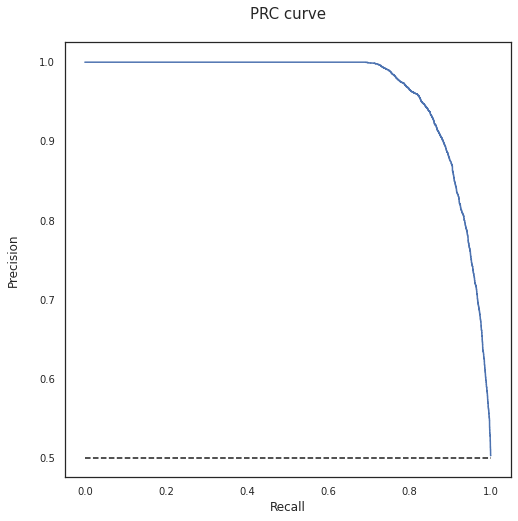

In [46]:
precision, recall, thresholds = precision_recall_curve(y_test, y_predict)

plt.figure(figsize = (8,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('Recall',fontsize=12)
plt.ylabel('Precision\n',fontsize=12)
plt.title('PRC curve\n',fontsize=15)
print(auc(recall, precision))
plt.show()

In [47]:
#from imblearn.over_sampling import SMOTE
#oversampling = SMOTE()
#x_train_over , y_train_over = oversampling.fit_sample(final_df,labels_df.iloc[:,0])
#x_train_over = pd.DataFrame(x_train_over)
#x_train_over.columns = ['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1',
       #'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
       #'health_worker', 'household_adults', 'household_children', 'age_group',
       #'education', 'race', 'sex', 'income_poverty', 'marital_status',
       #'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       #'behavioral', 'opinion_h1n1', 'opinion_seasonal_flu']
#x_train_over

In [48]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

model1 = RandomForestClassifier(n_estimators= 810,
    max_depth= 89.0988906332451,
    min_samples_split= 2,
    min_samples_leaf= 2,
    max_features='sqrt',
    bootstrap= False)
model1.fit(x_train,y_train)
y_predict = model1.predict(x_test)
y_train.value_counts()

h1n1_vaccine
1               14725
0               14721
dtype: int64

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(log_loss(y_test,y_predict))
print(classification_report(y_test,y_predict))


0.9000792393026942
[[5929  383]
 [ 878 5430]]
3.451165077638522
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6312
           1       0.93      0.86      0.90      6308

    accuracy                           0.90     12620
   macro avg       0.90      0.90      0.90     12620
weighted avg       0.90      0.90      0.90     12620



0.9577193354165109


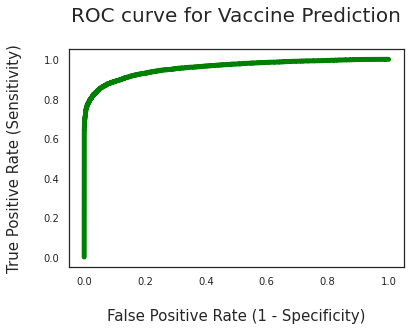

In [50]:
y_predict1 = model1.predict_proba(x_test)

from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve,auc
#tpr,fpr,thresholds = roc_curve(y_test,y_predict1#)
import matplotlib.pyplot as plt
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test,y_predict1[:,1])
plt.title('ROC curve for Vaccine Prediction\n')
plt.xlabel('\nFalse Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)\n')
plt.plot(fpr, tpr,color='green',lw=5)
print(roc_auc_score(y_test,y_predict1[:,1]))

plt.show()

0.9577193354165109
0.9672050865884472


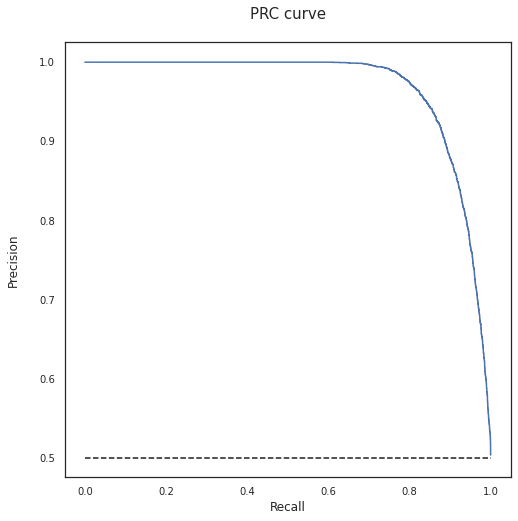

In [51]:
precision, recall, thresholds = precision_recall_curve(y_test, y_predict1[:,1])

plt.figure(figsize = (8,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('Recall',fontsize=12)
plt.ylabel('Precision\n',fontsize=12)
plt.title('PRC curve\n',fontsize=15)
print(roc_auc_score(y_test,y_predict1[:,1]))
print(auc(recall, precision))
plt.show()


In [52]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
y_train.value_counts()

h1n1_vaccine
1               14725
0               14721
dtype: int64

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(log_loss(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.8955625990491284
[[5927  385]
 [ 933 5375]]
3.607164432131768
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6312
           1       0.93      0.85      0.89      6308

    accuracy                           0.90     12620
   macro avg       0.90      0.90      0.90     12620
weighted avg       0.90      0.90      0.90     12620



In [55]:
pip install catboost

     |████████████████████████████████| 67.3MB 80kB/s 


In [56]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(learning_rate=0.2,n_estimators = 200,depth = 5,l2_leaf_reg =0.5,
                                random_seed = 2,colsample_bylevel = 0.9,verbose = False)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)
y_train.value_counts()

h1n1_vaccine
1               14725
0               14721
dtype: int64

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(log_loss(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.8951664025356577
[[5910  402]
 [ 921 5387]]
3.6208496520312026
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6312
           1       0.93      0.85      0.89      6308

    accuracy                           0.90     12620
   macro avg       0.90      0.90      0.89     12620
weighted avg       0.90      0.90      0.89     12620



In [58]:
from sklearn.ensemble import ExtraTreesClassifier  

model6 = ExtraTreesClassifier()
model6.fit(x_train,y_train)
y_predict6 = model6.predict(x_test)
y_train.value_counts()

h1n1_vaccine
1               14725
0               14721
dtype: int64

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
print(accuracy_score(y_test,y_predict6))
print(confusion_matrix(y_test,y_predict6))
print(log_loss(y_test,y_predict6))
print(classification_report(y_test,y_predict6))


0.9015055467511885
[[5882  430]
 [ 813 5495]]
3.401905141503088
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6312
           1       0.93      0.87      0.90      6308

    accuracy                           0.90     12620
   macro avg       0.90      0.90      0.90     12620
weighted avg       0.90      0.90      0.90     12620

